<a href="https://colab.research.google.com/github/viniciussogo/EBAC/blob/main/Mod_18_Tarefa_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [23]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [24]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [25]:
df[(df['sex'] == 1) & (df['flag_doente'] == 0)].shape[0]

92

In [26]:
df[(df['sex'] == 1) & (df['flag_doente'] == 1)].shape[0]

114

In [27]:
df[(df['sex'] == 0) & (df['flag_doente'] == 0)].shape[0]


72

In [28]:
df[(df['sex'] == 0) & (df['flag_doente'] == 1)].shape[0]

25

In [29]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins = True)
tab

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [30]:
tab['média de doentes'] = tab[1]/tab['All']
tab

flag_doente,0,1,All,média de doentes
sex,,,,
0.0,72,25,97,0.257732
1.0,92,114,206,0.553398
All,164,139,303,0.458746


In [31]:
tab['chance'] = tab[1]/tab[0]
tab

flag_doente,0,1,All,média de doentes,chance
sex,,,,,
0.0,72,25,97,0.257732,0.347222
1.0,92,114,206,0.553398,1.239130
All,164,139,303,0.458746,0.847561


In [32]:
tab ['chance total'] = tab['chance']/tab.loc['All','chance']
tab

flag_doente,0,1,All,média de doentes,chance,chance total
sex,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672
1.0,92,114,206,0.553398,1.239130,1.461996
All,164,139,303,0.458746,0.847561,1.000000


In [33]:
tab ['log_odd'] = np.log(tab['chance'])
tab

flag_doente,0,1,All,média de doentes,chance,chance total,log_odd
sex,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410
All,164,139,303,0.458746,0.847561,1.000000,-0.165392


In [34]:
tab ['woe'] = np.log(tab['chance total'])
tab

flag_doente,0,1,All,média de doentes,chance,chance total,log_odd,woe
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


<ipython-input-35-48935a92b077>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='woe', data=tab, palette='coolwarm')


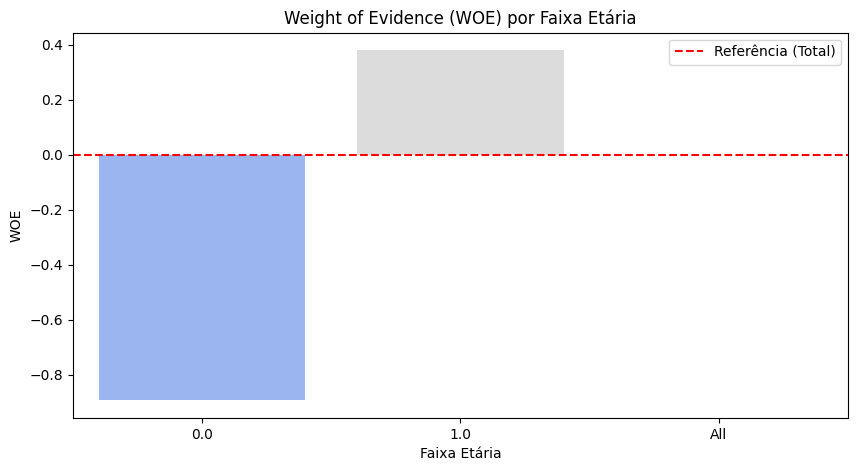

In [35]:
# Gráfico de barras para WOE
plt.figure(figsize=(10, 5))
sns.barplot(x='sex', y='woe', data=tab, palette='coolwarm')
plt.title('Weight of Evidence (WOE) por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('WOE')
plt.axhline(0, color='red', linestyle='--', label='Referência (Total)')
plt.legend()
plt.show()

<ipython-input-36-9a5d51565386>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='chance total', data=tab, palette='magma')


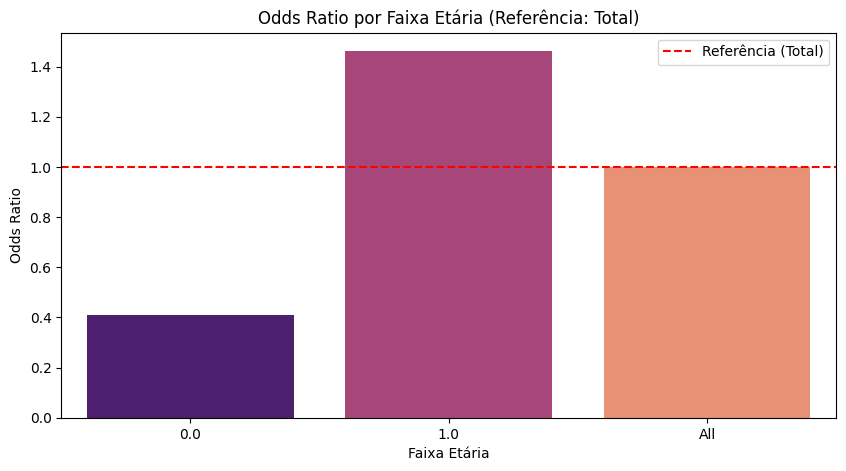

In [36]:
# Gráfico de barras para Odds Ratio
plt.figure(figsize=(10, 5))
sns.barplot(x='sex', y='chance total', data=tab, palette='magma')
plt.title('Odds Ratio por Faixa Etária (Referência: Total)')
plt.xlabel('Faixa Etária')
plt.ylabel('Odds Ratio')
plt.axhline(1, color='red', linestyle='--', label='Referência (Total)')
plt.legend()
plt.show()

<ipython-input-37-dd7cf2da5e21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='chance', data=tab, palette='viridis')


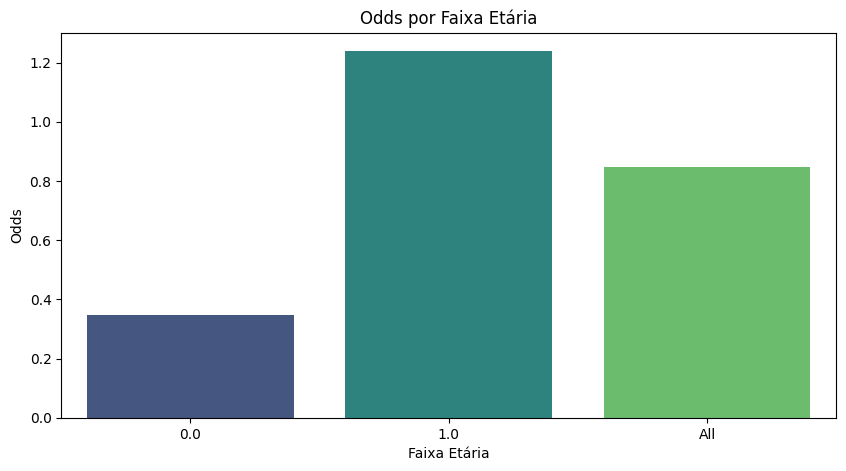

In [37]:
# Gráfico de barras para Odds
plt.figure(figsize=(10, 5))
sns.barplot(x='sex', y='chance', data=tab, palette='viridis')
plt.title('Odds por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Odds')
plt.show()

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [48]:
# Agrupar por faixa etária e calcular as estatísticas
bivariada_age = df.groupby('age').agg(
    total=('flag_doente', 'size'),  # Total de indivíduos
    saudaveis=('flag_doente', lambda x: (x == 0).sum()),  # Número de saudáveis
    doentes=('flag_doente', lambda x: (x == 1).sum()),  # Número de doentes
    media_doentes=('flag_doente', 'mean'),  # Média de doentes
    media_age=('age', 'mean')  # Média da variável age
).reset_index()

In [49]:
# Calcular Odds
bivariada_age['odds'] = bivariada_age['doentes'] / bivariada_age['saudaveis']

# Calcular Odds Ratio (usando o total como referência)
odds_total = bivariada_age['doentes'].sum() / bivariada_age['saudaveis'].sum()
bivariada_age['odds_ratio'] = bivariada_age['odds'] / odds_total

# Calcular Logito (LOG(Odds))
bivariada_age['logito'] = np.log(bivariada_age['odds'])

# Calcular Weight of Evidence (WOE)
bivariada_age['woe'] = np.log(bivariada_age['odds_ratio'])

# Exibir a tabela bivariada
print(bivariada_age)

     age  total  saudaveis  doentes  media_doentes  media_age      odds  \
0   29.0      1          1        0       0.000000       29.0  0.000000   
1   34.0      2          2        0       0.000000       34.0  0.000000   
2   35.0      4          2        2       0.500000       35.0  1.000000   
3   37.0      2          2        0       0.000000       37.0  0.000000   
4   38.0      2          1        1       0.500000       38.0  1.000000   
5   39.0      4          3        1       0.250000       39.0  0.333333   
6   40.0      3          1        2       0.666667       40.0  2.000000   
7   41.0     10          9        1       0.100000       41.0  0.111111   
8   42.0      8          7        1       0.125000       42.0  0.142857   
9   43.0      8          5        3       0.375000       43.0  0.600000   
10  44.0     11          8        3       0.272727       44.0  0.375000   
11  45.0      8          6        2       0.250000       45.0  0.333333   
12  46.0      7          

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

<ipython-input-52-a8b696b395d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='odds', data=bivariada_age, palette='viridis')


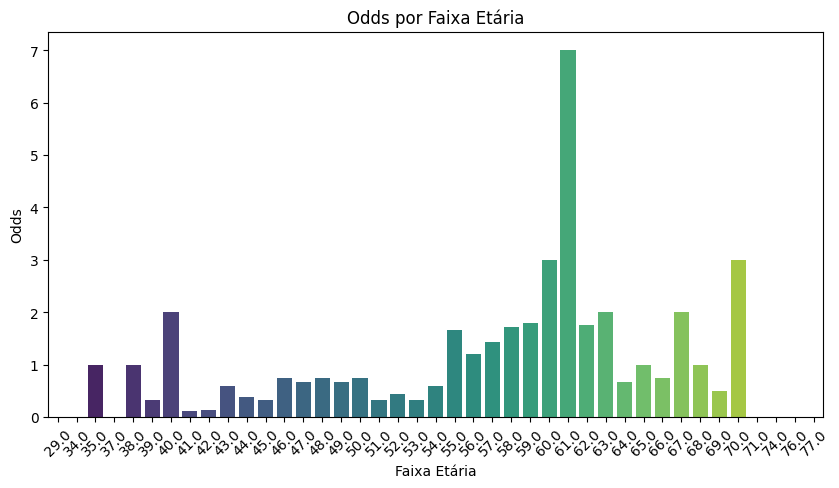

In [52]:
# Gráfico de barras para Odds
plt.figure(figsize=(10, 5))
sns.barplot(x='age', y='odds', data=bivariada_age, palette='viridis')
plt.xticks(rotation=45)
plt.title('Odds por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Odds')
plt.show()

<ipython-input-55-0f9c5734e468>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='woe', data=bivariada_age, palette='coolwarm')


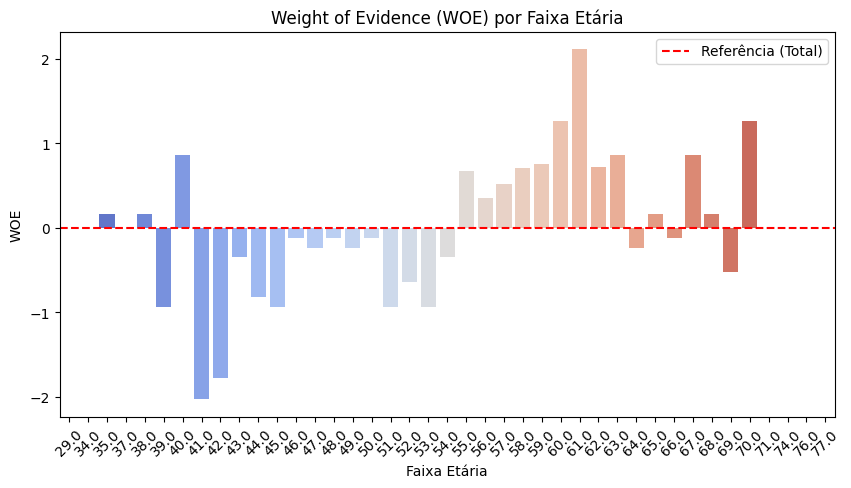

In [55]:
# Gráfico de barras para WOE
plt.figure(figsize=(10, 5))
sns.barplot(x='age', y='woe', data=bivariada_age, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Weight of Evidence (WOE) por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('WOE')
plt.axhline(0, color='red', linestyle='--', label='Referência (Total)')
plt.legend()
plt.show()